### Economics data set analysis

We will use Pandas to incorporate a small set of data into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary

**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Quarterly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly
                            
** Variable Description **

                            Series                        Description
                            Treated                       Dummy indicating whether the candidate received the treatment
                            Age                           Age in years
                            Education (years)             Years of Education
                            Black                         Dummy indicating African-American
                            Hispanic                      Dummy indicating Hispanic
                            Married                       Dummy indicating married
                            Real income Before ($)        Income before program
                        Real income After ($)         Income after program           


In [2]:
%pylab inline
import pandas as pd
import numpy as np
import glob

Populating the interactive namespace from numpy and matplotlib


/Users/Garrett/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [70]:
#import pandas as pd
#test = pd.DataFrame()
#aaa = pd.read_csv('/Users/Garrett/Documents/DSE/g4cheung/DSE200/data/economics/AAA.csv',header = 0)#,index_col = 'DATE')
#aaa.rename(columns = {'VALUE':'AAA'},inplace = True)
#baa = pd.read_csv('/Users/Garrett/Documents/DSE/g4cheung/DSE200/data/economics/BAA.csv',header = 0)#,index_col = 'DATE')
#baa.rename(columns = {'VALUE':'BAA'},inplace = True)
#aaa
#test = pd.merge(aaa,baa,how='outer',on = "DATE")
#test = test.set_index('DATE')

In [97]:
filelist = glob.glob('/Users/Garrett/Documents/DSE/g4cheung/DSE200/data/economics/*.csv')
filelist.sort()
econ_df = pd.DataFrame()
filelist2 = []
first = True
for i in filelist:
    filename = i.split('/')[len(i.split('/'))-1].replace('.csv','') ## change the number based on how many levels down from root
    df = pd.read_csv(i, delimiter = ',',header = 0)
    df.rename(columns={'VALUE':filename},inplace = True)
    #econ_df = econ_df.append(df)
    #print(df)
    if first:
        econ_df = df 
        first = False
        continue
    econ_df = pd.merge(econ_df,df,how='outer',on="DATE")
    ## merging empty dataframe with another will fail because empty df has no "DATE" column
econ_df = econ_df.set_index('DATE')
econ_df.head()



,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE
DATE,,,,,,,,
1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN
1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN
1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN
1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN
1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN


In [98]:
econ_df['term_premium'] = econ_df['GS10'] - econ_df['GS1']
econ_df['default_premium'] = econ_df['BAA'] - econ_df['AAA']
#econ_df.head()
econ_df

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,term_premium,default_premium
DATE,,,,,,,,,,
1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN,NaN,1.77
1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN,NaN,1.85
1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN,NaN,1.76
1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN,NaN,1.79
1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN,NaN,1.70
1919-06-01,5.40,7.04,NaN,NaN,NaN,NaN,4.9119,NaN,NaN,1.64
1919-07-01,5.44,7.06,NaN,NaN,NaN,NaN,5.2071,NaN,NaN,1.62
1919-08-01,5.56,7.13,NaN,NaN,NaN,NaN,5.2876,NaN,NaN,1.57
1919-09-01,5.60,7.27,NaN,NaN,NaN,NaN,5.1803,NaN,NaN,1.67


In [101]:
econ_df = econ_df.dropna()
econ_df.head()

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,term_premium,default_premium
DATE,,,,,,,,,,
1957-01-01,3.77,4.49,28.5,2854.5,3.37,3.46,21.9289,4.2,0.09,0.72
1957-04-01,3.67,4.44,28.8,2848.2,3.49,3.48,21.8215,3.9,-0.01,0.77
1957-07-01,3.99,4.73,29.0,2875.9,3.81,3.93,21.9289,4.2,0.12,0.74
1957-10-01,4.10,4.99,29.2,2846.4,4.01,3.97,21.4189,4.5,-0.04,0.89
1958-01-01,3.60,4.83,29.3,2772.7,2.65,3.09,20.1306,5.8,0.44,1.23


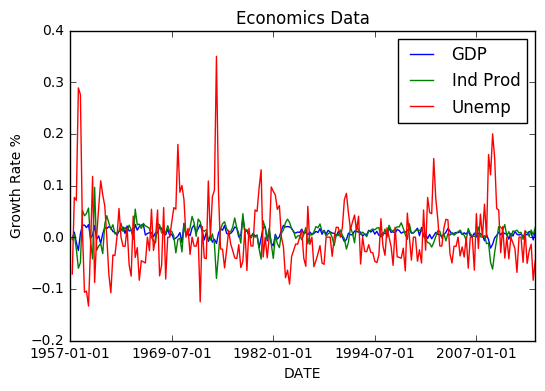

In [133]:
gdp_growth = econ_df['GDPC1'].pct_change()
gdp_growth.plot()
plt.title('Economics Data')
plt.xlabel('Date')
plt.ylabel('Growth Rate %')
plt.grid() ## can also use plt.show to plot without gridlines
IP_growth = econ_df['INDPRO'].pct_change()
IP_growth.plot()
unemp_rate = econ_df['UNRATE'].pct_change()
unemp_rate.plot()
plt.legend(['GDP','Ind Prod','Unemp'])

** Analysis**

From the graph we can see positive correlation between GDP and Industrial Production. There also appears to be an inverse correlation between Unemployment and GDP/Industrial Production.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a873dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e445d90>]], dtype=object)

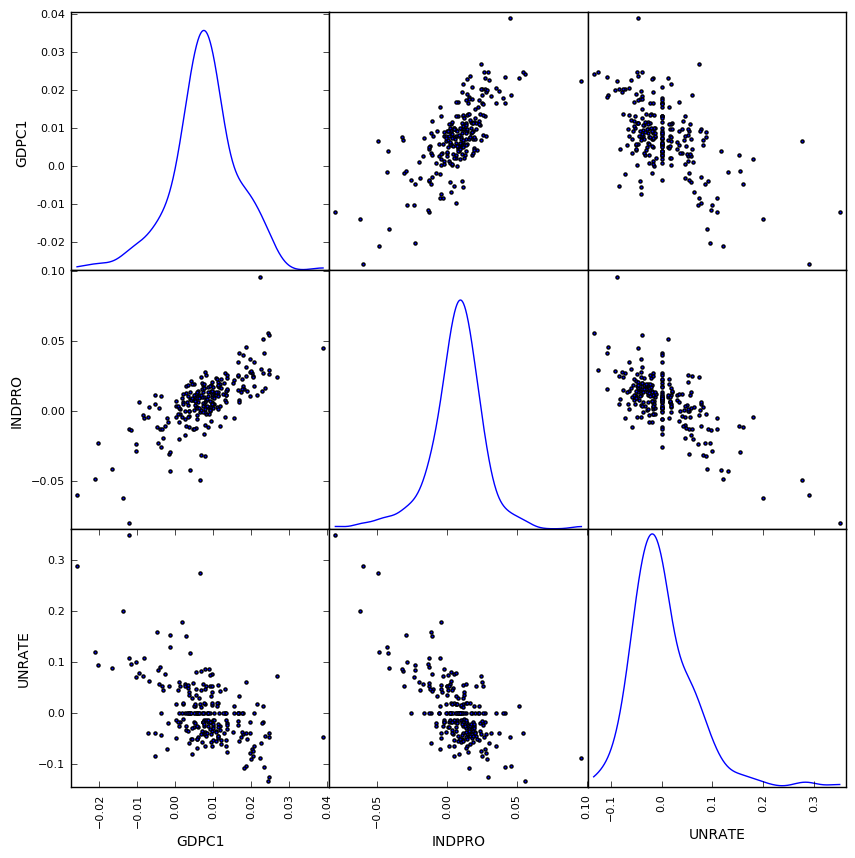

In [140]:
from pandas.tools.plotting import scatter_matrix

econ_scatter= econ_df.loc[:,['GDPC1','INDPRO','UNRATE']].pct_change() #creates new dataframe econ_scatter with only 
##columns for gdpc1, indpro, and unemp
scatter_matrix(econ_scatter,alpha=1, figsize=(10,10),diagonal = 'kde')

**Nutrition dataset analysis**

Using the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

The db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Using the db, we can show:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. 

In [4]:
#!mkdir data
#%cd data
#!curl https://github.com/wesm/pydata-book/blob/master/ch07/foods-2011-10-03.json > foods.json
!curl https://raw.githubusercontent.com/pydata/pydata-book/master/ch07/foods-2011-10-03.json > foods

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.3M  100 30.3M    0     0  3358k      0  0:00:09  0:00:09 --:--:-- 4365k


First, we create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

In [14]:
import json
db = json.load(open('foods'))
meta_data =pd.DataFrame.from_dict(db)
meta_data = meta_data.drop(['nutrients','portions','tags'],axis=1)
meta_data.head()



,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

In [30]:
nutritionalinfo = []
for i in db:
    df= pd.DataFrame.from_dict(i['nutrients'])
    df['id'] = i['id']
    nutritionalinfo.append(df)
print(str(len(nutritionalinfo)) + ' items with nutritional information')
nutritionalinfo[1].head()

6636 items with nutritional information


,description,group,units,value,id
0,Protein,Composition,g,24.90,1009
1,Total lipid (fat),Composition,g,33.14,1009
2,"Carbohydrate, by difference",Composition,g,1.28,1009
3,Ash,Other,g,3.93,1009
4,Energy,Energy,kcal,403.00,1009


Drop duplicate entries

In [31]:
nutrients = pd.concat(nutritionalinfo).drop_duplicates()
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [35]:
nutrients.columns=['nutrient_description','nutrient_group','units','value','id'] ## fixing some column titles
nutrients.head()

,nutrient_description,nutrient_group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [38]:
Foods = pd.merge(nutrients,meta_data,how='outer',on = 'id') ## merging our nutrient and meta_data dataframes
Foods.head()

,nutrient_description,nutrient_group,units,value,id,description,group,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [39]:
nutrition = Foods.groupby(['nutrient_description'])['value'].transform(max) == Foods['value']
highest_nutrients = Foods[nutrition].drop_duplicates()
highest_nutrients

,nutrient_description,nutrient_group,units,value,id,description,group,manufacturer
5893,"Cryptoxanthin, beta",Vitamins,mcg,6186.000,2028,"Spices, paprika",Spices and Herbs,
6424,Vitamin K (phylloquinone),Vitamins,mcg,1714.500,2038,"Spices, sage, ground",Spices and Herbs,
11876,Lactose,Sugars,g,56.000,3805,"Infant formula, MEAD JOHNSON, ENFAMIL, with ir...",Baby Foods,None
12031,Lactose,Sugars,g,56.000,3808,"Infant formula, MEAD JOHNSON, ENFAMIL, LIPIL, ...",Baby Foods,None
12082,Lactose,Sugars,g,56.000,3809,"Infant formula, MEAD JOHNSON, ENFAMIL, low iro...",Baby Foods,None
12389,Lactose,Sugars,g,56.000,3817,"Infant formula, MEAD JOHNSON, ENFAMIL, LIPIL, ...",Baby Foods,None
14385,Glucose (dextrose),Sugars,g,57.000,3869,"Infant formula, MEAD JOHNSON, ENFAMIL, LACTOFR...",Baby Foods,None
17197,"Iron, Fe",Elements,mg,87.470,2066,"Salad dressing, russian dressing, low calorie",Fats and Oils,
17389,Total lipid (fat),Composition,g,100.000,4038,"Oil, wheat germ",Fats and Oils,
17414,Vitamin E (alpha-tocopherol),Vitamins,mg,149.400,4038,"Oil, wheat germ",Fats and Oils,


This function will generate a bar plot of a nutrient in each food group. Please provide a nutrient name: Water
Please provide a quantile: 0.1


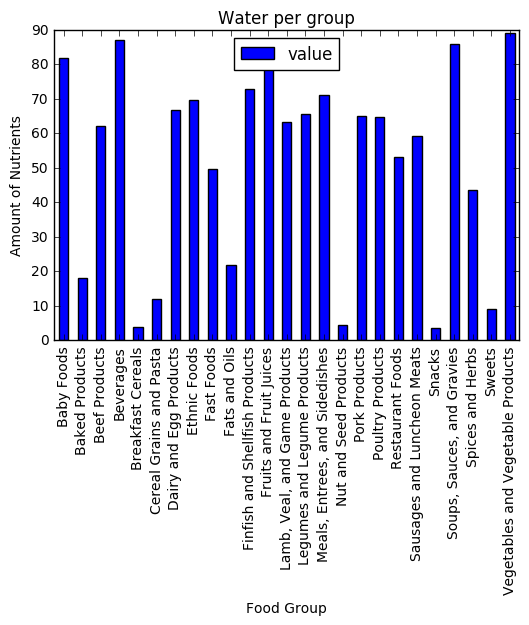

In [130]:
nutrient_name = str(raw_input("This function will generate a bar plot of a nutrient in each food group. Please provide a nutrient name: "))
quant_value = raw_input('Please provide a quantile: ')
checknutrient = list(set(Foods['nutrient_description'].tolist()))
if nutrient_name in checknutrient:
    #groups = Foods.loc[Foods['nutrient_description'] == nutrient_name].drop_duplicates('group').loc[:,['value','group']]
    groups = Foods.loc[Foods['nutrient_description'] == nutrient_name].loc[:,['value','group']]
    groupgraph = groups.set_index('group')
    groupquant= {}
    for i in list(set(groupgraph.index.values.tolist())):
        groupquant[i] =groupgraph.loc[i].quantile(q=0.5)
    quantdf = pd.DataFrame(data = groupquant)
    quantdf = quantdf.transpose()
    quantdf.rename_axis('group')
    quantdf.plot(kind = 'bar')
    plt.title(nutrient_name +  ' per group')
    plt.xlabel('Food Group')
    plt.ylabel('Amount of Nutrients')

else:
    print(nutrient_name + ' not in data')
    print('please select one of the following: ')
    for i in checknutrient:
        print(i)
